In [1]:
pwd

'C:\\Users\\Olakeyede Olayinka'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
from pylab import rcParams
from numpy import cov
import seaborn as sns
%matplotlib inline



In [3]:
a = pd.read_csv('C:\\Users\\Olakeyede Olayinka\\downloads\\loans_2018.csv')
#copy of data set
copy_of_dataset = a.copy()

C:\Users\Olakeyede Olayinka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
a.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
a.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,0.0,0.0,...,270.0,270.000000,270.0,270.000000,233.000000,270.000000,270.000000,376.000000,376.000000,376.000000
mean,NaN,NaN,16025.020394,16025.020394,16021.668722,12.729272,466.614617,8.009399e+04,NaN,NaN,...,3.0,198.084370,3.0,11.977778,591.397597,15740.816852,205.039593,7050.864043,55.058670,18.382979
std,NaN,NaN,10138.075023,10138.075023,10137.900881,5.150130,286.910450,8.887161e+04,NaN,NaN,...,0.0,151.944225,0.0,9.434940,465.875246,9582.705213,211.514958,5035.647613,9.598626,6.157240
min,NaN,NaN,1000.000000,1000.000000,725.000000,5.310000,29.760000,0.000000e+00,NaN,NaN,...,3.0,5.950000,3.0,0.000000,17.850000,424.110000,0.070000,413.930000,30.480000,1.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,8.460000,254.560000,4.600000e+04,NaN,NaN,...,3.0,88.622500,3.0,2.000000,258.720000,8202.280000,32.870000,3316.412500,45.000000,18.000000
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,11.800000,386.820000,6.600000e+04,NaN,NaN,...,3.0,159.425000,3.0,11.000000,424.260000,13247.860000,149.855000,5450.570000,60.000000,18.000000
75%,NaN,NaN,22000.000000,22000.000000,22000.000000,16.010000,629.040000,9.600000e+04,NaN,NaN,...,3.0,274.552500,3.0,20.000000,819.900000,22529.437500,314.047500,9623.287500,65.000000,24.000000
max,NaN,NaN,40000.000000,40000.000000,40000.000000,30.990000,1670.150000,9.930475e+06,NaN,NaN,...,3.0,845.220000,3.0,29.000000,2535.660000,40149.350000,1072.990000,28503.000000,80.000000,24.000000


**Data Cleaning**

In [6]:
##get percentage of missing values for each column

for col in a.columns:
    pct_missing = np.mean(a[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 100.0%
member_id - 100.0%
loan_amnt - 0.0%
funded_amnt - 0.0%
funded_amnt_inv - 0.0%
term - 0.0%
int_rate - 0.0%
installment - 0.0%
grade - 0.0%
sub_grade - 0.0%
emp_title - 11.0%
emp_length - 8.0%
home_ownership - 0.0%
annual_inc - 0.0%
verification_status - 0.0%
issue_d - 0.0%
loan_status - 0.0%
pymnt_plan - 0.0%
url - 100.0%
desc - 100.0%
purpose - 0.0%
title - 0.0%
zip_code - 0.0%
addr_state - 0.0%
dti - 0.0%
delinq_2yrs - 0.0%
earliest_cr_line - 0.0%
inq_last_6mths - 0.0%
mths_since_last_delinq - 56.0%
mths_since_last_record - 87.0%
open_acc - 0.0%
pub_rec - 0.0%
revol_bal - 0.0%
revol_util - 0.0%
total_acc - 0.0%
initial_list_status - 0.0%
out_prncp - 0.0%
out_prncp_inv - 0.0%
total_pymnt - 0.0%
total_pymnt_inv - 0.0%
total_rec_prncp - 0.0%
total_rec_int - 0.0%
total_rec_late_fee - 0.0%
recoveries - 0.0%
collection_recovery_fee - 0.0%
last_pymnt_d - 0.0%
last_pymnt_amnt - 0.0%
next_pymnt_d - 10.0%
last_credit_pull_d - 0.0%
collections_12_mths_ex_med - 0.0%
mths_since_last_ma

In [7]:
##remove columns that have more than 50% missing values
a = a[a.columns[a.isnull().mean() < 0.5]]
a.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [10]:
a = a.dropna(subset=['loan_amnt'])


**Q1. Explore the distribution of loans amounts, does the interest rate increase with the size of the loan?**

C:\Users\Olakeyede Olayinka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


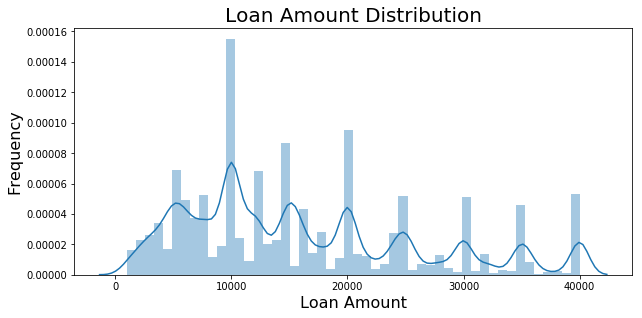

In [11]:
plt.figure(figsize=(10,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(a["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribution", fontsize=20)


In [15]:
a["loan_amnt"].mean()

16025.02039406997

In [16]:
a["loan_amnt"].median()

14000.0

In [17]:
a["loan_amnt"].mode()

0    10000
dtype: int64

Other Loan Amunt Distribution

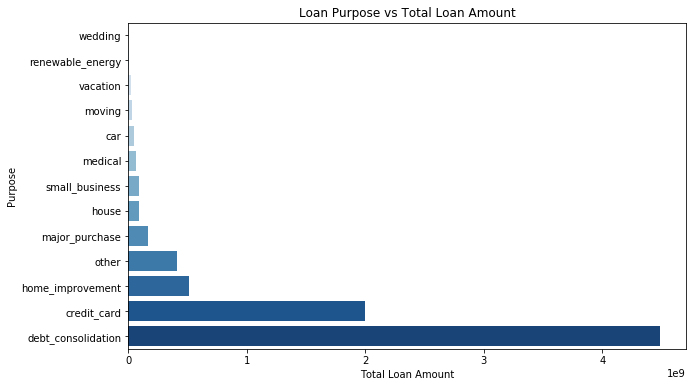

In [19]:
##loan amount and purpose
plt.figure(figsize=(10,6))
plot_data = a.groupby('purpose')['loan_amnt'].sum().sort_values()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('Purpose')
ax = plt.xlabel('Total Loan Amount')
ax = plt.title('Loan Purpose vs Total Loan Amount')


In [20]:
a.groupby('purpose')['loan_amnt'].sum().sort_values()

purpose
wedding                    44775
renewable_energy         3505575
vacation                23769050
moving                  30447125
car                     51947600
medical                 69258000
small_business          87123900
house                   89277100
major_purchase         169309325
other                  415214450
home_improvement       513793525
credit_card           1998415025
debt_consolidation    4484157700
Name: loan_amnt, dtype: int64

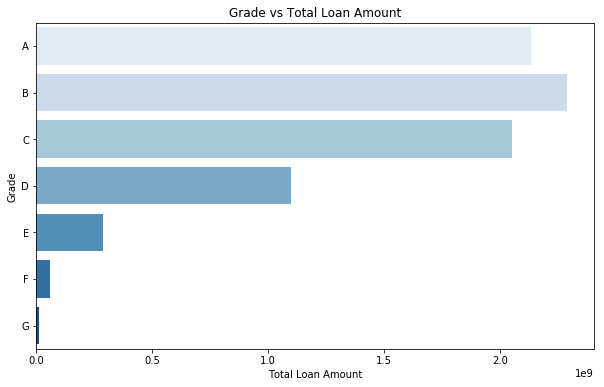

In [16]:
#Grade vs Loan Amount
plt.figure(figsize=(10,6))
plot_data = a.groupby('grade')['loan_amnt'].sum()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('Grade')
ax = plt.xlabel('Total Loan Amount')
ax = plt.title('Grade vs Total Loan Amount')

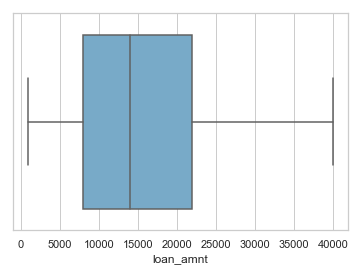

In [18]:
## Loan Amount boxplot 
sns.set(style="whitegrid")
ax3 = sns.boxplot(x=a["loan_amnt"], palette='Blues')


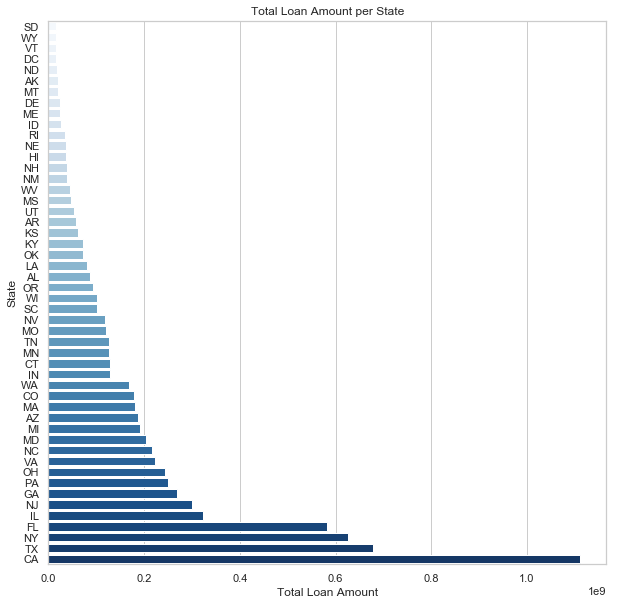

In [91]:
plt.figure(figsize=(10,10))
plot_data = a.groupby('addr_state')['loan_amnt'].sum().sort_values()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('State')
ax = plt.xlabel('Total Loan Amount')
ax = plt.title('Total Loan Amount per State')

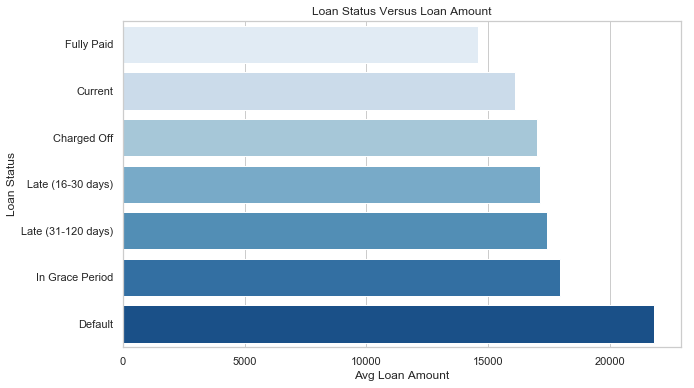

In [90]:
plt.figure(figsize=(10,6))
plot_data = a.groupby('loan_status')['loan_amnt'].mean().sort_values()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('Loan Status')
ax = plt.xlabel('Avg Loan Amount')
ax = plt.title('Loan Status Versus Loan Amount')


Interest Rate and Loan Amount

In [19]:
x1 = a['int_rate']
x2 = a['loan_amnt']


In [20]:
rcParams['figure.figsize'] = 10, 6

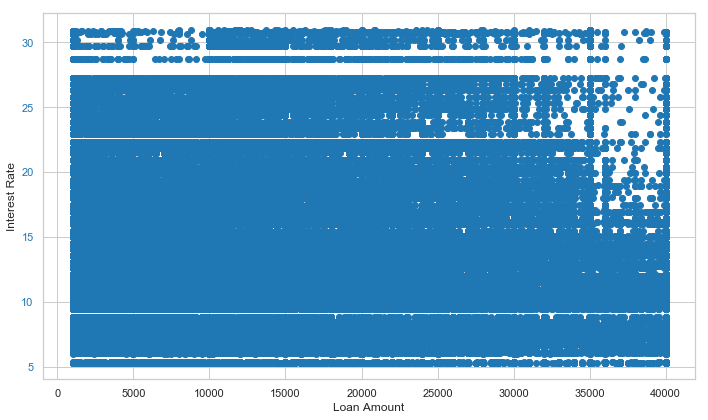

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel('Interest Rate')
ax1.scatter(x2, x1, color=color)
ax1.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [24]:
##Categirize loan amount into high, nedium, and small

a['loan_amnt_category'] = np.nan
lst = [a]

for col in lst:
    col.loc[col['loan_amnt'] <= 10000, 'loan_amnt_category'] = 'Small'
    col.loc[(col['loan_amnt'] > 10000) & (col['loan_amnt'] <= 35000), 'loan_amnt_category'] = 'Medium'
    col.loc[col['loan_amnt'] > 35000, 'loan_amnt_category'] = 'High'
    
a['loan_amnt_category']

0          Small
1         Medium
2          Small
3          Small
4         Medium
5          Small
6          Small
7          Small
8          Small
9          Small
10         Small
11        Medium
12        Medium
13         Small
14        Medium
15         Small
16         Small
17        Medium
18        Medium
19        Medium
20         Small
21        Medium
22         Small
23         Small
24        Medium
25        Medium
26        Medium
27        Medium
28         Small
29        Medium
           ...  
495212      High
495213    Medium
495214    Medium
495215    Medium
495216    Medium
495217      High
495218     Small
495219     Small
495220    Medium
495221      High
495222     Small
495223    Medium
495224     Small
495225    Medium
495226     Small
495227     Small
495228     Small
495229     Small
495230    Medium
495231    Medium
495232    Medium
495233     Small
495234    Medium
495235    Medium
495236    Medium
495237     Small
495238     Small
495239     Sma

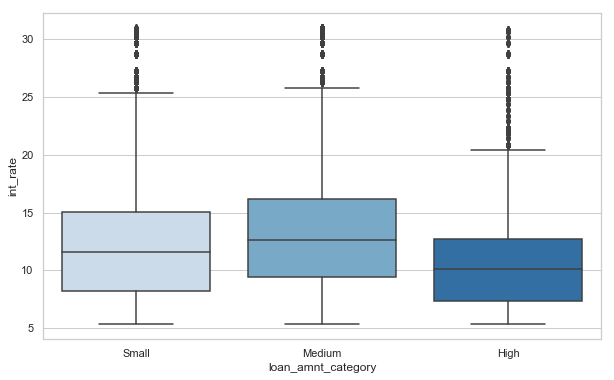

In [23]:
ax5 = sns.boxplot(x="loan_amnt_category", y="int_rate", data=a, palette='Blues')


***Q2 Does the monthly payment (installment) and interest rate have any effect on the loan status?***

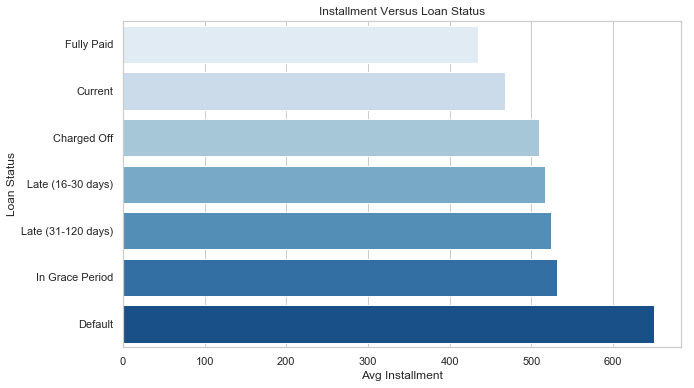

In [64]:
##installment and loan status
plt.figure(figsize=(10,6))
plot_data = a.groupby('loan_status')['installment'].mean().sort_values()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('Loan Status')
ax = plt.xlabel('Avg Installment')
ax = plt.title('Installment Versus Loan Status')

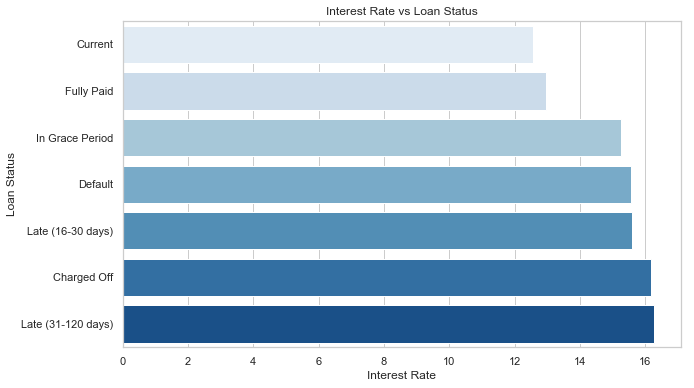

In [61]:
##interest rate and loan status
plt.figure(figsize=(10,6))
plot_data = a.groupby('loan_status')['int_rate'].mean().sort_values()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='Blues')
ax = plt.ylabel('Loan Status')
ax = plt.xlabel('Interest Rate')
ax = plt.title('Interest Rate vs Loan Status')

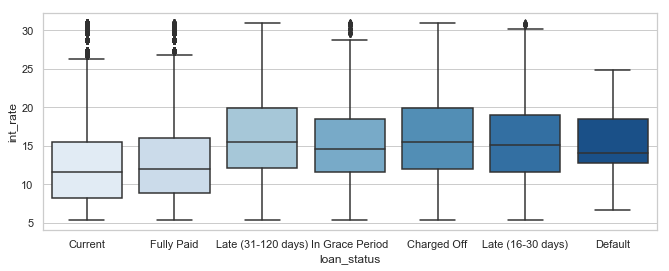

In [125]:
#fig_dims = (6, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#height=3, 
   # aspect=4,
   # color='blue
#sns.catplot(x = "names", y = "values", ax=ax, data=df)
plt.figure(figsize=(11,4))
sns.boxplot(x="loan_status", y="int_rate", data=a, palette='Blues');
#sns.catplot(x="loan_status", y="int_rate", height = 3, aspect =4, data=a);


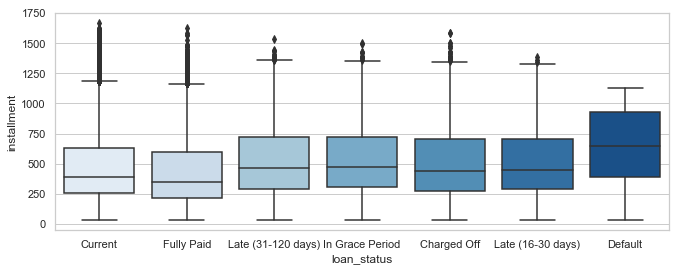

In [28]:
plt.figure(figsize=(11,4))
sns.boxplot(x="loan_status", y="installment", data=a, palette='Blues');


current and fully paid have the lowest installment and interest rates which does not come as a surprise as they are 'good loans'
current and fully paid have the lowest interest rate. hypothesis- people who are likely to pay off their loans have a good credit rating hence, lower interest rates are given to these customers

In [30]:
##split the data into two parts - non-deliquent loans ==0, deliquent loans ==1
delinquent_loans = [1 if i=='Default' or i=='Charged Off' or i=='Late (31-120 days)' or i=='In Grace Period' 
               or i=='Late (16-30 days)' else 0 for i in a['loan_status']]
a['delinquent_loans'] = delinquent_loans

a['delinquent_loans'].value_counts()

0    477558
1     17684
Name: delinquent_loans, dtype: int64

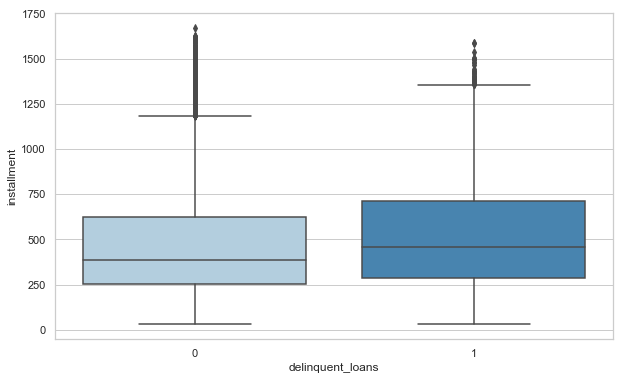

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="delinquent_loans", y="installment", data=a, palette='Blues');

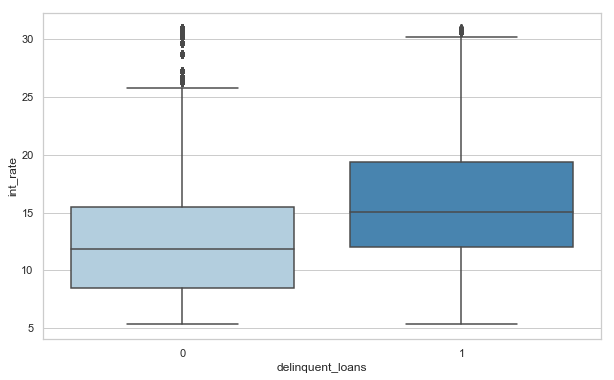

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x="delinquent_loans", y="int_rate", data=a, palette='Blues')

*****Q3 answered in power point slides*****